<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/edo/blob/main/banco_preguntas/parcial_4/p_4_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## [Lista de reproducción de apoyo a la lectura experimental e interactiva de este cuaderno]()

# Capítulo 1

# El panorama del aprendizaje automático

Cuando la mayoría de la gente oye hablar de "aprendizaje automático", se imagina un robot: un mayordomo fiable o un Terminator mortal, según a quién se le pregunte. 

Pero el aprendizaje automático no es sólo una fantasía futurista; ya está aquí. 

De hecho, lleva décadas, existe desde hace décadas en algunas aplicaciones especializadas, como el reconocimiento óptico de caracteres (OCR).

Pero la primera aplicación de ML que se convirtió en la corriente principal, mejorando la vida de cientos de millones de personas, se impuso en los años 90: el filtro de spam. 

No es exactamente un Skynet autoconsciente, pero sí se puede calificar técnicamente como Machine (de hecho, ha aprendido tan bien que rara vez es necesario marcar un correo electrónico como spam). Le siguieron cientos de aplicaciones de ML que ahora impulsan silenciosamente cientos de productos y funciones que usted utiliza habitualmente, desde mejores recomendaciones hasta la búsqueda por voz. ¿Dónde empieza y dónde acaba el aprendizaje automático?  ¿Qué significa exactamente que una máquina aprenda algo? Si descargo una copia de Wikipedia, ¿mi ordenador ha aprendido realmente algo? ¿Es que de repente es más inteligente? En este capítulo empezaremos por aclarar qué es el aprendizaje automático y por qué puede querer utilizarlo.

A continuación, antes de explorar el continente del aprendizaje automático, vamos a el mapa y conoceremos las principales regiones y los hitos más notables: aprendizaje supervisado frente a no supervisado, aprendizaje en línea frente a aprendizaje por lotes, aprendizaje basado en instancias frente a aprendizaje basado en modelos. A continuación, el flujo de trabajo de un proyecto típico de ML, discutiremos los principales
retos a los que puede enfrentarse y cómo evaluar y ajustar un sistema de aprendizaje automático.

Este capítulo introduce un montón de conceptos fundamentales (y jerga) que todo científico de datos debería conocer de memoria. Será una visión general de alto nivel (es el único capítulo sin mucho código), todo bastante sencillo, pero debes asegurarte de que todo te queda muy claro antes de continuar con el resto del libro. Así que coge un café y ¡comencemos!

##  ¿Qué es el aprendizaje automático?

El aprendizaje automático es la ciencia (y el arte) de programar ordenadores para que
para que puedan aprender de los datos. Esta es una definición un poco más general:

*El aprendizaje automático es el campo de estudio que da a los ordenadores la capacidad de aprender sin ser programados explícitamente.*
Arthur Samuel, 1959

Y otra más orientada a la ingeniería

*Se dice que un programa informático aprende de la experiencia E con respecto a
alguna tarea T y alguna medida de rendimiento P, si su rendimiento en T,
medido por P, mejora con la experiencia E.*
Tom Mitchell, 1997

Su filtro de spam es un programa de aprendizaje automático que, dado algunos ejemplos de correos electrónicos de spam (por ejemplo, marcados por los usuarios) y ejemplos de correos electrónicos normales (no spam, también llamado "HAM"), puede aprender a marcar el spam. Los ejemplos que el sistema utiliza para aprender se denominan conjunto de entrenamiento. 


Cada ejemplo de entrenamiento se denomina instancia (o muestra) de entrenamiento. En este caso, la tarea T es marcar el spam de los nuevos correos electrónicos, la experiencia E son los datos de entrenamiento, y la medida de rendimiento P; por ejemplo, se puede utilizar la proporción de correos electrónicos clasificados correctamente. Esta medida de rendimiento concreta se denomina exactitud, y se utiliza a menudo en las tareas de clasificación.
Si sólo descargas una copia de Wikipedia, tu ordenador tiene muchos más datos, pero no es repentinamente mejor en ninguna tarea. Por lo tanto, descargar una copia de Wikipedia no es aprendizaje automático.


## ¿Por qué utilizar el aprendizaje automático?

Considere cómo escribiría un filtro de spam utilizando técnicas de programación tradicionales (figura 1-1):
1. En primer lugar, considere el aspecto que suele tener el spam. Usted puede observar que algunas palabras o frases (como "4U", "tarjeta de crédito", "gratis" y "increíble") tienden a aparecer mucho en la línea de asunto. Tal vez también se dé cuenta de otros patrones en el nombre del remitente, el cuerpo del correo electrónico y otras partes de este.
2. Escribirías un algoritmo de detección para cada uno de los patrones que haya observado, y su programa marcaría los correos electrónicos como spam si se detectan varios de estos patrones.
3. Probaría su programa y repetiría los pasos 1 y 2 hasta que fuera lo suficientemente bueno como para lanzarlo.


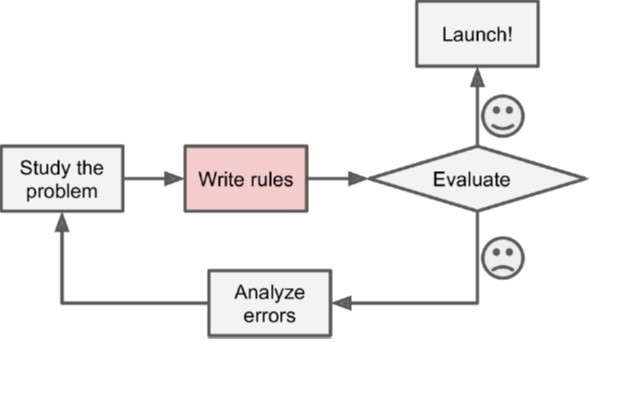

In [5]:
from IPython.display import Image
Image('prueba3.jpg')

Como el problema es difícil, su programa probablemente se convertirá en una larga lista
de reglas complejas, muy difíciles de mantener.
En cambio, un filtro de spam basado en técnicas de aprendizaje automático aprende automáticamente qué palabras y frases son buenos predictores de spam
detectando patrones de palabras inusualmente frecuentes en los ejemplos de spam
en comparación con los ejemplos de ham(correos deseados) ya obtenidos (figura 1-2).  El programa es mucho más corto, más fácil de mantener y, probablemente, más preciso.
¿Qué pasa si los spammers se dan cuenta de que todos sus correos electrónicos que contienen "4U" están bloqueados? Podrían empezar a escribir "Para U" en su lugar. 
Un filtro de spam que utilice técnicas de programación tradicionales tendría que actualizarse para marcar los correos "Para U". Si los spammers siguen esquivando su filtro de spam, tendrá que seguir escribir nuevas reglas para siempre.

En cambio, un filtro de spam basado en técnicas de aprendizaje automático se da cuenta automáticamente de que "Para U" se ha vuelto inusualmente frecuente en el spam marcado por los usuarios, y empieza a marcarlos sin que usted intervenga (figura 1-3).


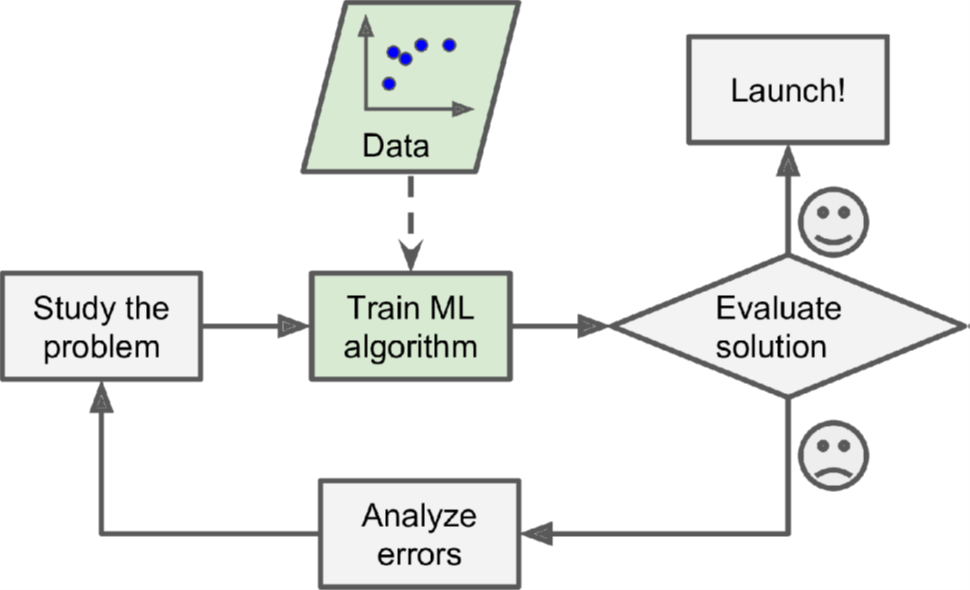

In [3]:
from IPython.display import Image
Image('figura1_2.png')


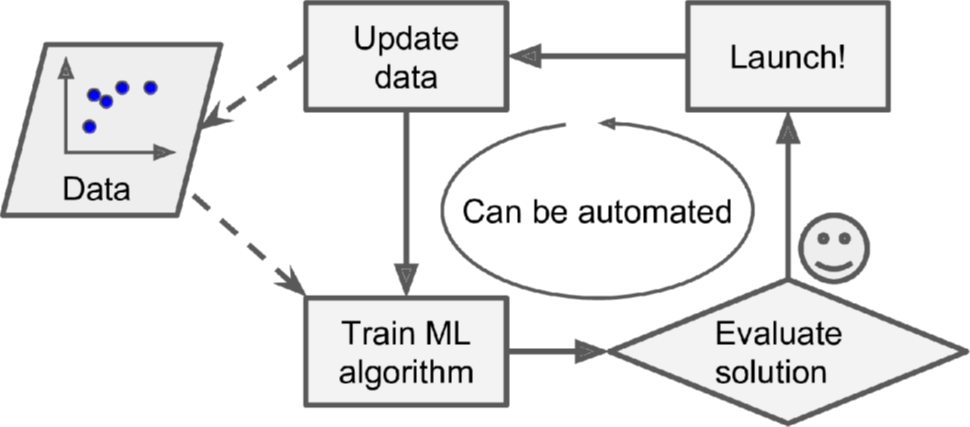

In [4]:
from IPython.display import Image
Image('figura1_3.png')

Otro ámbito en el que brilla el aprendizaje automático es el de los problemas que son
demasiado complejos para los enfoques tradicionales o que no tienen un algoritmo conocido. Por ejemplo, considere el reconocimiento del habla. Digamos que quieres empezar de forma sencilla y escribir un programa capaz de distinguir las palabras "uno" y "dos". Usted sabe que la palabra "dos" comienza con un sonido agudo ("T" two), por lo que
podría codificar un algoritmo que mida la intensidad del sonido agudo y utilizarlo para distinguir los unos y los dos, pero obviamente esta técnica no se adapta a miles de palabras pronunciadas por millones de personas en entornos ruidosos y en docenas de idiomas. La mejor solución (al menos hoy en día) es escribir un algoritmo que aprenda por sí mismo
grabaciones de ejemplo para cada palabra.
Por último, el aprendizaje automático puede ayudar a los humanos a aprender (Figura 1-4). ML, los algoritmos de ML pueden ser inspeccionados para ver lo que han aprendido (aunque para algunos algoritmos esto puede ser complicado). Por ejemplo, una vez que un filtro de spam se ha entrenado con suficiente spam, se puede inspeccionar fácilmente para revelar la lista de palabras y combinaciones de palabras que cree que son los mejores predictores de spam. A veces esto revelará correlaciones insospechadas o nuevas tendencias, y, por tanto, permite comprender mejor el problema. La aplicación de técnicas de ML para profundizar en grandes cantidades de datos puede ayudar a descubrir patrones que no eran evidentes de inmediato. A esto se le llama *data mining*.


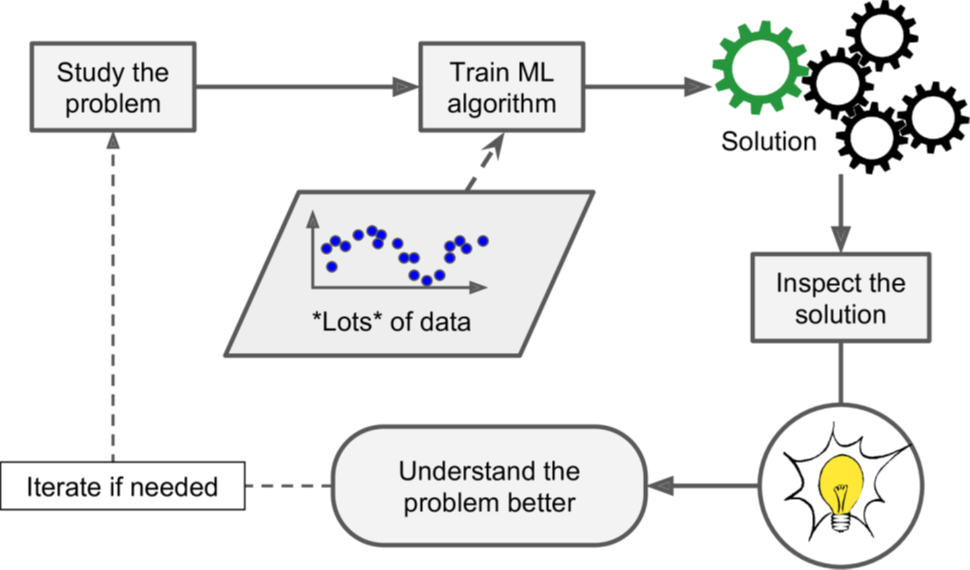

In [6]:
from IPython.display import Image
Image('figura1_4.png')

En resumen:
-	El aprendizaje automático es ideal para resolver problemas para los que las soluciones existentes requieren mucho ajuste o largas listas de reglas: un algoritmo de Machine Learning a menudo puede simplificar el código y rendir mejor que el enfoque tradicional.
-	Problemas complejos para los que el uso de un enfoque tradicional no da una buena solución: las mejores técnicas de aprendizaje automático pueden simplificar el código y funcionar mejor que el enfoque tradicional.
-	Entornos fluctuantes: un sistema de Machine Learning puede adaptarse a nuevos datos.
-	Obtener información sobre problemas complejos y grandes cantidades de datos.



## Ejemplos de aplicaciones
Veamos algunos ejemplos concretos de tareas de aprendizaje automático, junto con
con las técnicas que pueden abordarlas:
-	Analizar imágenes de productos en una línea de producción para clasificarlos automáticamente.
Se trata de la clasificación de imágenes, que suele realizarse mediante redes neuronales convolucionales (CNN; véase el capítulo 14).
-	Detección de tumores en escáneres cerebrales.
Se trata de una segmentación semántica, en la que cada píxel es clasificado ( ya que queremos determinar la ubicación y la forma exactas de los tumores), normalmente utilizando también CNN.
-	Clasificación automática de artículos de prensa.
Se trata del procesamiento del lenguaje natural (PLN) y, más concretamente, de la clasificación de texto, que puede abordarse mediante redes neuronales recurrentes (RNN), CNN o Transformers (véase el capítulo 16).
- Marcar automáticamente los comentarios ofensivos en los foros de discusión
También se trata de la clasificación de textos, utilizando las mismas herramientas de PNL.
-	Resumir automáticamente documentos largos.
Se trata de una rama de la PNL denominada resumen de textos, que también utiliza las mismas herramientas.
-	Crear un chatbot o un asistente personal.
Esto implica muchos componentes de PNL, incluyendo módulos de natural (NLU) y módulos de respuesta a preguntas.
-	Predicción de los ingresos de la empresa el año que viene, basada en muchas métricas de rendimiento.
Se trata de una tarea de regresión (es decir, de predicción de valores) que puede abordarse como un modelo de regresión lineal o polinómico (véase el capítulo 4), una SVM de regresión (véase el capítulo 5), una regresión Random Forest (véase el capítulo 7), o una red neuronal artificial (véase el capítulo 10). Si desea tener en cuenta secuencias de métricas de rendimiento pasadas, es posible que desee utilizar RNNs, CNNs o Transformers (véanse los capítulos 15 y 16).
-	Hacer que tu aplicación reaccione a los comandos de voz
Se trata del reconocimiento de voz, que requiere el procesamiento de muestras de audio: Como son secuencias largas y complejas, suelen procesarse RNNs, CNNs o Transformers (véanse los capítulos 15 y 16).
-	Detección de fraudes con tarjetas de crédito
Se trata de la detección de anomalías (véase el capítulo 9).
-	Segmentar a los clientes en función de sus compras para poder diseñar una estrategia de marketing diferente para cada segmento. Se trata de la agrupación (véase el capítulo 9).
-	Representar un conjunto de datos complejo y de gran dimensión en un diagrama claro y perspicaz
Esto es la visualización de datos, que a menudo implica técnicas de reducción de la dimensionalidad (véase el capítulo 8).

-	Recomendar un producto que pueda interesar a un cliente, basándose en sus
compras anteriores
Se trata de un sistema de recomendación. Un enfoque consiste en alimentar las compras anteriores (y otra información sobre el cliente) a una red neuronal artificial (véase el capítulo 10), y hacer que emita la siguiente compra más probable. Esta red neuronal. Esta se entrena normalmente con secuencias de compras pasadas de todos los clientes.
-	Construir un bot inteligente para un juego
Para ello se suele utilizar el aprendizaje por refuerzo (RL; véase el Capítulo 18), que es una rama del aprendizaje automático que entrena a los agentes (como los bots) para que elijan las acciones que maximizarán sus tiempos (por ejemplo, un bot puede obtener una recompensa cada vez que el jugador pierda algunos puntos de vida), dentro de un entorno determinado (por ejemplo, puntos de vida), dentro de un entorno determinado (como el juego). El famoso programa AlphaGo que venció al campeón del mundo en el juego de Go fue construido utilizando RL.

Esta lista podría seguir y seguir, pero espero que le dé una idea de la
increíble amplitud y complejidad de las tareas que el aprendizaje automático puede
abordar, y los tipos de técnicas que utilizaría para cada tarea.


## Tipos de sistemas de aprendizaje automático
Existen tantos tipos de sistemas de aprendizaje automático que resulta útil clasificarlos en amplias categorías, basándose en los siguientes criterios:
-	Si se entrenan o no con supervisión humana (supervisados, no supervisados, semisupervisados y reforzados).
-	Si pueden o no aprender de forma incremental sobre la marcha (aprendizaje en línea vs al aprendizaje por lotes)
-	Si funcionan simplemente comparando los nuevos puntos de datos con los conocidos, o bien detectando patrones en los datos de entrenamiento y construyendo un modelo predictivo, como hacen los científicos (aprendizaje basado en instancias vs al aprendizaje basado en modelos)

Estos criterios no son excluyentes; puedes combinarlos como quieras.
Por ejemplo, un filtro de spam de última generación puede aprender sobre la marcha utilizando un modelo de red neuronal profunda entrenado con ejemplos de spam y ham; esto lo convierte en un sistema de aprendizaje supervisado en línea y basado en un modelo.
Veamos cada uno de estos criterios con más detalle.


## Aprendizaje supervisado/no supervisado

Los sistemas de aprendizaje automático pueden clasificarse según la cantidad y el tipo de tipo de supervisión que reciben durante el entrenamiento. Hay cuatro categorías principales categorías: aprendizaje supervisado, aprendizaje no supervisado, semisupervisado y aprendizaje reforzado.

*Aprendizaje supervisado*

En el aprendizaje supervisado, el conjunto de entrenamiento que se alimenta al algoritmo incluye las soluciones deseadas, llamadas etiquetas (Figura 1-5).



<img src = 'https://github.com/marco-canas/cielo/blob/main/revision_bibloografica/c_1_geron/fig_1_5.png?raw=true'>